In [1]:
%matplotlib notebook

In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample function to plot player movement from tracking_week.csv
def animate_player_movement(df, nflId, gameId, playId):
    # Filter data for the specific player, game, and play
    player_data = df[(df['nflId'] == nflId) & (df['gameId'] == gameId) & (df['playId'] == playId)]
    
    # Extract the x, y coordinates and frame IDs
    x_coords = player_data['x'].values
    y_coords = player_data['y'].values
    frames = player_data['frameId'].values
    
    # Set up the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, 120)  # NFL field length (0-120 yards)
    ax.set_ylim(0, 53.3)  # NFL field width (0-53.3 yards)
    ax.set_title(f"Player {nflId} Movement - Game {gameId}, Play {playId}")
    
    # Initialize a point to represent the player
    player_dot, = ax.plot([], [], 'bo', markersize=10)  # Blue circle for the player

    # Initialize function for the animation
    def init():
        player_dot.set_data([], [])
        return player_dot,

    # Update function for each frame in the animation
    def update(frame):
        current_x = x_coords[frame]
        current_y = y_coords[frame]
        player_dot.set_data(current_x, current_y)
        return player_dot,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(frames), init_func=init, blit=True, interval=100)
    
    return anim

In [3]:
# Example usage
# Load the tracking_week.csv
df = pd.read_csv('tracking_week_1.csv')

<IPython.core.display.Javascript object>


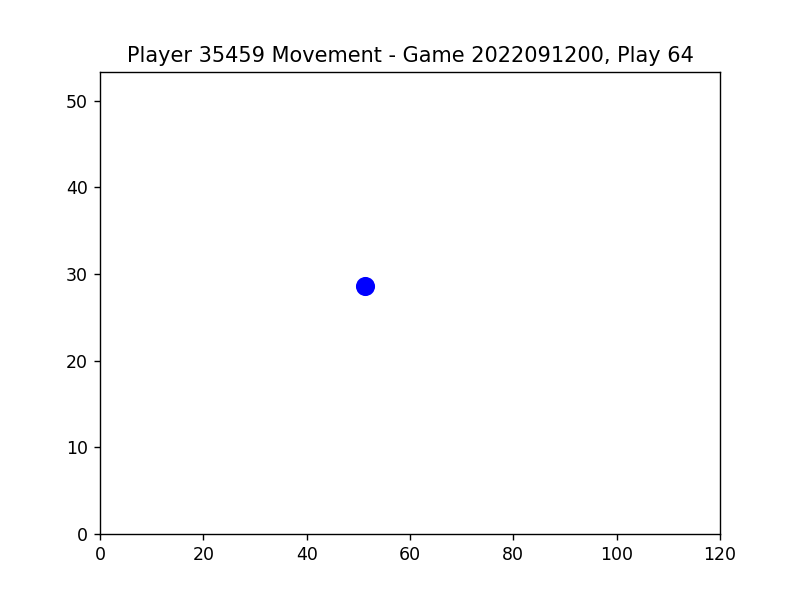

In [4]:
# Parameters: nflId (player), gameId, playId
animate_player_movement(df, nflId=35459, gameId=2022091200, playId=64)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Function to initialize player markers on the plot
def init_player_markers(ax, unique_players, play_data):
    player_markers = {} 
    # Define colors for teams (for simplicity, you can modify based on actual teams)
    team_colors = {
    'DEN': 'orange',
    'SEA': 'green',
    'football': 'brown',  # Special case for the football
    'TB': 'red',
    'DAL': 'navy',
    'TEN': 'lightblue',
    'NYG': 'blue',
    'MIN': 'purple',
    'GB': 'green',
    'LV': 'black',
    'LAC': 'yellow',
    'KC': 'red',
    'ARI': 'darkred',
    'JAX': 'teal',
    'WAS': 'burgundy',
    'NYJ': 'green',
    'BAL': 'purple',
    'MIA': 'aqua',
    'NE': 'navy',
    'IND': 'blue',
    'HOU': 'darkblue',
    'PHI': 'darkgreen',
    'DET': 'blue',
    'CIN': 'orange',
    'PIT': 'yellow',
    'SF': 'red',
    'CHI': 'darkorange',
    'CLE': 'brown',
    'CAR': 'lightblue',
    'NO': 'black',
    'ATL': 'red',
    'BUF': 'blue',
    'LA': 'blue'
    }
    football_color = 'brown'  # Special color for the football
    
    for player_id in unique_players:
        if pd.isna(player_id):
            # Special case for the football
            player_markers[player_id] = ax.plot([], [], 'o', color=football_color, markersize=10)[0]
        else:
            # Get the team and set color
            team = play_data[play_data['nflId'] == player_id]['club'].iloc[0]
            color = team_colors.get(team, 'green')  # Default to green if team not found
            player_markers[player_id] = ax.plot([], [], 'o', color=color)[0]
    
    return player_markers

# Function to update player positions on the plot for each frame
def update_player_positions(frame, play_data, player_markers):
    current_frame_data = play_data[play_data['frameId'] == frame]
    
    for player_id, marker in player_markers.items():
        if player_id in current_frame_data['nflId'].values or pd.isna(player_id):
            if pd.isna(player_id):
                # Handle football (nflId is NaN)
                football_data = current_frame_data[pd.isna(current_frame_data['nflId'])]
                if not football_data.empty:
                    x, y = football_data['x'].values[0], football_data['y'].values[0]
                    marker.set_data(x, y)
            else:
                # Handle players
                player_info = current_frame_data[current_frame_data['nflId'] == player_id]
                if not player_info.empty:
                    x, y = player_info['x'].values[0], player_info['y'].values[0]
                    marker.set_data(x, y)
    
    return list(player_markers.values())

# Main function to animate the entire play with all players
def animate_play(df, gameId, playId):
    # Filter data for the specific game and play
    play_data = df[(df['gameId'] == gameId) & (df['playId'] == playId)]
    
    # Extract unique player IDs (includes NaN for football)
    unique_players = play_data['nflId'].unique()

    # Set up the plot
    fig, ax = plt.subplots()
    ax.set_xlim(0, 120)  # NFL field length (0-120 yards)
    ax.set_ylim(0, 53.3)  # NFL field width (0-53.3 yards)
    ax.set_title(f"Game {gameId}, Play {playId} - Player Movement")

    # Initialize player markers
    player_markers = init_player_markers(ax, unique_players, play_data)

    # Create the animation function
    def update(frame):
        return update_player_positions(frame, play_data, player_markers)

    # Create the animation
    anim = FuncAnimation(fig, update, frames=play_data['frameId'].unique(), blit=True, interval=100)
    
    plt.show()
    return anim


<IPython.core.display.Javascript object>


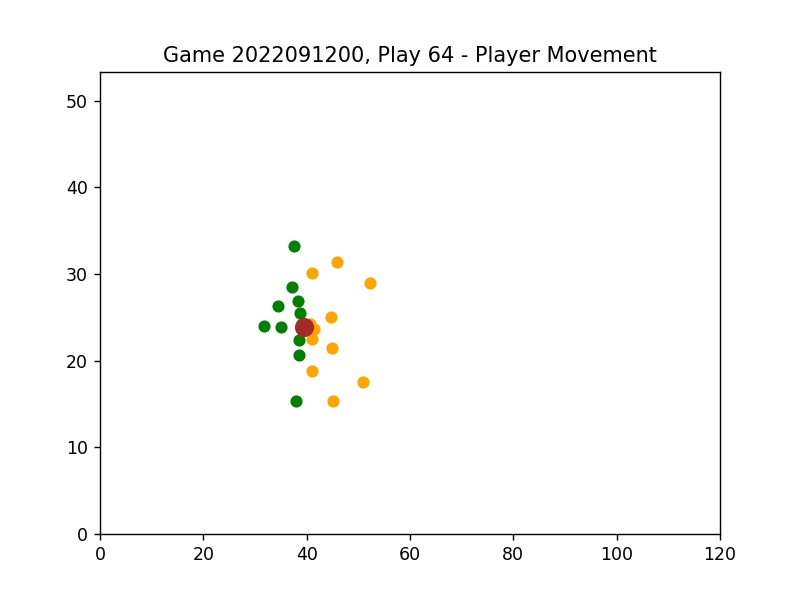

In [6]:
# Animate a play with all players and football
animate_play(df, gameId=2022091200, playId=64)

In [7]:
df.club.unique()

array(['DEN', 'SEA', 'football', 'TB', 'DAL', 'TEN', 'NYG', 'MIN', 'GB',
       'LV', 'LAC', 'KC', 'ARI', 'JAX', 'WAS', 'NYJ', 'BAL', 'MIA', 'NE',
       'IND', 'HOU', 'PHI', 'DET', 'CIN', 'PIT', 'SF', 'CHI', 'CLE',
       'CAR', 'NO', 'ATL', 'BUF', 'LA'], dtype=object)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def init_player_markers(ax, unique_players, play_data):
    player_markers = {}
    team_colors = {
        'DEN': 'orange', 'SEA': 'green', 'TB': 'red', 'DAL': 'navy',
        'TEN': 'lightblue', 'NYG': 'blue', 'MIN': 'purple', 'GB': 'green',
        'LV': 'black', 'LAC': 'yellow', 'KC': 'red', 'ARI': 'darkred',
        'JAX': 'teal', 'WAS': 'burgundy', 'NYJ': 'green', 'BAL': 'purple',
        'MIA': 'aqua', 'NE': 'navy', 'IND': 'blue', 'HOU': 'darkblue',
        'PHI': 'darkgreen', 'DET': 'blue', 'CIN': 'orange', 'PIT': 'yellow',
        'SF': 'red', 'CHI': 'darkorange', 'CLE': 'brown', 'CAR': 'lightblue',
        'NO': 'black', 'ATL': 'red', 'BUF': 'blue', 'LA': 'blue'
    }
    football_color = 'brown'

    try:
        for player_id in unique_players:
            if pd.isna(player_id):
                player_markers[player_id] = ax.plot([], [], 'o', color=football_color, 
                                                  markersize=10, label='Football')[0]
            else:
                # Handle potential KeyError if player's team is not found
                player_data = play_data[play_data['nflId'] == player_id]
                if not player_data.empty:
                    team = player_data['club'].iloc[0]
                    color = team_colors.get(team, 'gray')  # Use gray as fallback color
                    player_markers[player_id] = ax.plot([], [], 'o', color=color)[0]
        
        return player_markers
    except Exception as e:
        print(f"Error initializing player markers: {str(e)}")
        raise

def update_player_positions(frame, play_data, player_markers):
    try:
        current_frame_data = play_data[play_data['frameId'] == frame]
        
        for player_id, marker in player_markers.items():
            player_data = current_frame_data[
                pd.isna(current_frame_data['nflId']) if pd.isna(player_id) 
                else (current_frame_data['nflId'] == player_id)
            ]
            
            if not player_data.empty:
                x, y = player_data['x'].iloc[0], player_data['y'].iloc[0]
                marker.set_data(x, y)
        
        return list(player_markers.values())
    except Exception as e:
        print(f"Error updating positions for frame {frame}: {str(e)}")
        return []

def animate_play(df, gameId, playId):
    try:
        # Input validation
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input 'df' must be a pandas DataFrame")
        
        required_columns = ['gameId', 'playId', 'frameId', 'nflId', 'x', 'y', 'club']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"DataFrame missing required columns: {missing_columns}")
        
        # Filter data
        play_data = df[(df['gameId'] == gameId) & (df['playId'] == playId)]
        if play_data.empty:
            raise ValueError(f"No data found for game {gameId}, play {playId}")
        
        # Extract unique players
        unique_players = play_data['nflId'].unique()
        
        # Set up the plot
        plt.style.use('dark_background')  # Better visibility
        fig, ax = plt.subplots(figsize=(15, 8))
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.set_title(f"Game {gameId}, Play {playId} - Player Movement", pad=15)
        ax.grid(True, alpha=0.3)
        
        # Add field markers
        for i in range(0, 120, 10):
            ax.axvline(x=i, color='white', alpha=0.2)
            ax.text(i + 5, 2, str(i), ha='center', color='white', alpha=0.5)
        
        # Initialize markers
        player_markers = init_player_markers(ax, unique_players, play_data)
        
        # Create animation
        anim = FuncAnimation(
            fig, 
            update_player_positions,
            frames=sorted(play_data['frameId'].unique()),
            fargs=(play_data, player_markers),
            blit=True,
            interval=100,
            repeat=True
        )
        
        plt.tight_layout()
        plt.show()
        return anim
        
    except Exception as e:
        print(f"Error in animate_play: {str(e)}")
        plt.close()  # Clean up any partial figure
        raise


<IPython.core.display.Javascript object>


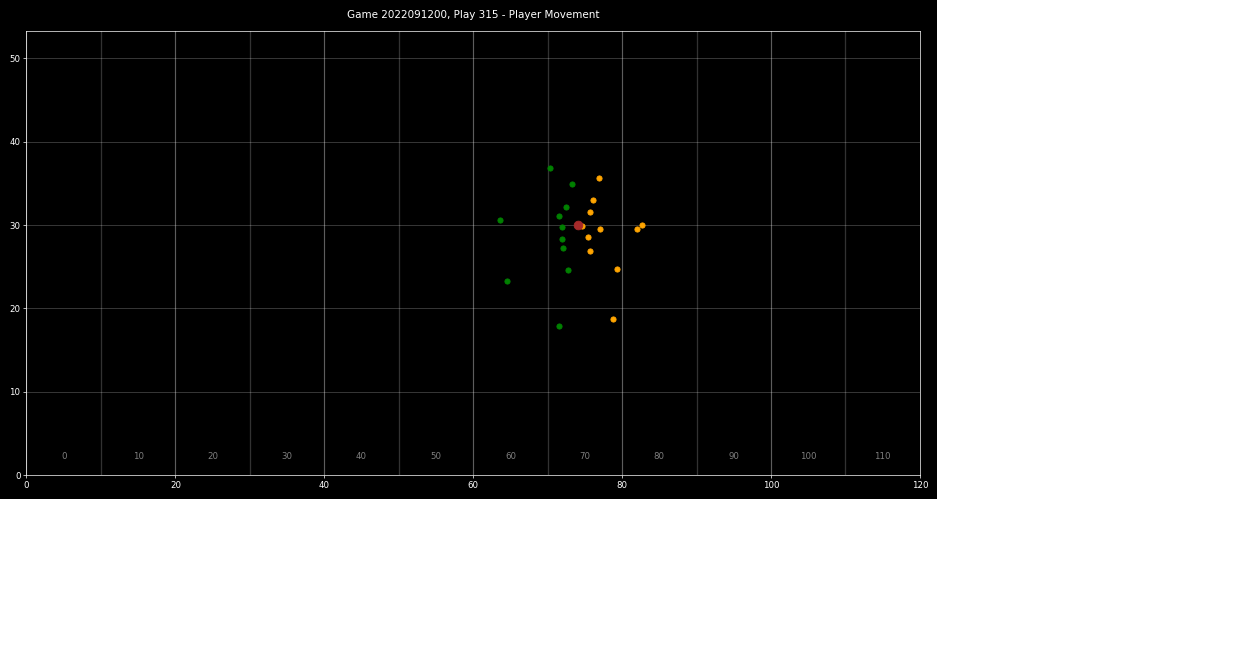

In [19]:
# Animate a play with all players and football
animate_play(df, gameId=2022091200, playId=315)

In [9]:
# Specify the gameId for which you want to see all the plays
gameId = 2022091200

# Filter the DataFrame for the specified game and get unique playIds
plays_in_game = df[df['gameId'] == gameId]['playId'].unique()

# Display all unique plays in the game
print(f"All unique play IDs in game {gameId}:")
print(plays_in_game)

All unique play IDs in game 2022091200:
[  64   85  109  156  180  201  264  286  315  346  375  401  446  467
  565  601  622  643  664  688  716  741  762  786  810  882  910  931
  983 1004 1028 1057 1092 1164 1217 1241 1299 1320 1344 1409 1433 1465
 1487 1521 1550 1579 1642 1680 1704 1725 1764 1793 1815 1851 1967 1988
 2009 2038 2067 2093 2188 2244 2268 2292 2370 2391 2479 2500 2522 2546
 2591 2613 2667 2688 2712 2750 2779 2801 2830 2883 2923 2944 2965 3001
 3048 3077 3101 3125 3149 3173 3194 3216 3245 3267 3296 3325 3382 3404
 3467 3491 3515 3553 3574 3596 3628 3685 3723 3747 3795 3826 3980 4012]
